<a href="https://colab.research.google.com/github/Pachaq/Telecom-X-Parte-2-Predicci-n-de-Cancelaci-n-/blob/main/Telecom_X_%E2%80%93_Parte_2_Predicci%C3%B3n_de_Cancelaci%C3%B3n_(Churn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom X – Parte 2: Predicción de Cancelación (Churn)**

#📌 Extracción

In [ ]:
import pandas as pd
import json

# Load the data from the JSON file
with open('/content/TelecomX_Data.json', 'r') as f:
    data = json.load(f)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
display(df.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Display the column names and their data types
print(df.info())

# Display the first few rows of the DataFrame to understand the data structure
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación



In [ ]:
# Check for missing values in the DataFrame and sum them by column
missing_values = df.isnull().sum()

# Display the sum of missing values for each column
display(missing_values)

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [ ]:
# Check for duplicate customerID values, as customerID should be unique for each row
duplicate_customer_ids = df.duplicated(subset=['customerID']).sum()

# Display the total count of duplicate customer IDs
print(f"Total number of duplicate customer IDs: {duplicate_customer_ids}")

Total number of duplicate customer IDs: 0


In [ ]:
nested_columns = ['customer', 'phone', 'internet', 'account']

# Create a copy to avoid modifying the original DataFrame in place during concatenation
df_flattened = df.copy()

for col in nested_columns:
    # Normalize the nested column into a new DataFrame
    normalized_df = pd.json_normalize(df_flattened[col])

    # Concatenate the original DataFrame (excluding the nested column) with the normalized DataFrame
    df_flattened = pd.concat([df_flattened.drop(columns=[col]), normalized_df], axis=1)

# Update the original df variable with the flattened DataFrame
df = df_flattened

# Display the first few rows of the updated DataFrame
display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Verificando inconsistencias y errores de formato en las columnas

In [ ]:
for col in df.columns:
    print(f"\n--- Analyzing column: {col} ---")
    if df[col].dtype == 'object':
        unique_values = df[col].unique()
        print(f"Data type: object")
        print(f"Number of unique values: {len(unique_values)}")
        # Print unique values, but limit the list for columns with many unique values
        if len(unique_values) < 50:
            print(f"Unique values: {unique_values}")
        else:
            print(f"Unique values: {unique_values[:50]}...") # Display only the first 50
    elif df[col].dtype in ['int64', 'float64']:
        print(f"Data type: {df[col].dtype}")
        display(df[col].describe())
    else:
        print(f"Data type: {df[col].dtype} (No specific analysis performed for this type)")


--- Analyzing column: customerID ---
Data type: object
Number of unique values: 7267
Unique values: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS'
 '0017-DINOC' '0017-IUDMW' '0018-NYROU' '0019-EFAEP' '0019-GFNTW'
 '0020-INWCK' '0020-JDNXP' '0021-IKXGC' '0022-TCJCI' '0023-HGHWL'
 '0023-UYUPN' '0023-XUOPT' '0027-KWYKW' '0030-FNXPP' '0031-PVLZI'
 '0032-PGELS' '0036-IHMOT' '0040-HALCW' '0042-JVWOJ' '0042-RLHYP'
 '0047-ZHDTW' '0048-LUMLS' '0048-PIHNL' '0052-DCKON' '0052-YNYOT'
 '0056-EPFBG' '0057-QBUQH' '0058-EVZWM' '0060-FUALY' '0064-SUDOG'
 '0064-YIJGF' '0067-DKWBL' '0068-FIGTF' '0071-NDAFP' '0074-HDKDG'
 '0076-LVEPS' '0078-XZMHT' '0080-EMYVY' '0080-OROZO' '0082-LDZUE']...

--- Analyzing column: Churn ---
Data type: object
Number of unique values: 3
Unique values: ['No' 'Yes' '']

--- Analyzing column: gender ---
Data type: object
Number of unique values: 2
Unique values: ['Female' 'Male']

--- Analyzing

,SeniorCitizen
count,7267.000000
mean,0.162653
std,0.369074
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000



--- Analyzing column: Partner ---
Data type: object
Number of unique values: 2
Unique values: ['Yes' 'No']

--- Analyzing column: Dependents ---
Data type: object
Number of unique values: 2
Unique values: ['Yes' 'No']

--- Analyzing column: tenure ---
Data type: int64


,tenure
count,7267.000000
mean,32.346498
std,24.571773
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000



--- Analyzing column: PhoneService ---
Data type: object
Number of unique values: 2
Unique values: ['Yes' 'No']

--- Analyzing column: MultipleLines ---
Data type: object
Number of unique values: 3
Unique values: ['No' 'Yes' 'No phone service']

--- Analyzing column: InternetService ---
Data type: object
Number of unique values: 3
Unique values: ['DSL' 'Fiber optic' 'No']

--- Analyzing column: OnlineSecurity ---
Data type: object
Number of unique values: 3
Unique values: ['No' 'Yes' 'No internet service']

--- Analyzing column: OnlineBackup ---
Data type: object
Number of unique values: 3
Unique values: ['Yes' 'No' 'No internet service']

--- Analyzing column: DeviceProtection ---
Data type: object
Number of unique values: 3
Unique values: ['No' 'Yes' 'No internet service']

--- Analyzing column: TechSupport ---
Data type: object
Number of unique values: 3
Unique values: ['Yes' 'No' 'No internet service']

--- Analyzing column: StreamingTV ---
Data type: object
Number of unique value

,Charges.Monthly
count,7267.000000
mean,64.720098
std,30.129572
min,18.250000
25%,35.425000
50%,70.300000
75%,89.875000
max,118.750000



--- Analyzing column: Charges.Total ---
Data type: object
Number of unique values: 6531
Unique values: ['593.3' '542.4' '280.85' '1237.85' '267.4' '571.45' '7904.25' '5377.8'
 '340.35' '5957.9' '2460.55' '8456.75' '351.5' '7261.25' '2560.1' '6849.4'
 '1993.2' '72.1' '2791.5' '25.1' '1306.3' '1215.6' '1849.95' '57.2'
 '76.35' '30.5' '5656.75' '1090.6' '471.85' '1396.9' '929.3' '3247.55'
 '900.9' '7942.15' '1343.4' '825.4' '1070.15' '4959.6' '5597.65' '224.5'
 '1929' '91.1' '2078.95' '630.6' '1611' '1242.45' '6316.2' '727.85' '3532'
 '44.3']...


In [ ]:
# Handle the empty string in the 'Churn' column. Replace '' with NaN for consistency.
df['Churn'] = df['Churn'].replace('', pd.NA)

# Convert 'Charges.Total' to numeric, coercing errors to NaN.
# This handles potential non-numeric strings that caused it to be object type.
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Check for missing values again after handling the inconsistencies
print("\n--- Missing values after handling inconsistencies ---")
display(df.isnull().sum())

# Re-analyze the 'Churn' and 'Charges.Total' columns to confirm changes
print("\n--- Analyzing column: Churn after cleaning ---")
print(f"Data type: {df['Churn'].dtype}")
print(f"Unique values: {df['Churn'].unique()}")

print("\n--- Analyzing column: Charges.Total after cleaning ---")
print(f"Data type: {df['Charges.Total'].dtype}")
display(df['Charges.Total'].describe())


--- Missing values after handling inconsistencies ---


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0



--- Analyzing column: Churn after cleaning ---
Data type: object
Unique values: ['No' 'Yes']

--- Analyzing column: Charges.Total after cleaning ---
Data type: float64


,Charges.Total
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


In [ ]:
# Check for duplicate rows based on all columns
duplicates_before = df.duplicated().sum()
print(f"Number of duplicate rows before dropping: {duplicates_before}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify that duplicate rows have been removed
duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows after dropping: {duplicates_after}")

Number of duplicate rows before dropping: 0
Number of duplicate rows after dropping: 0


valores faltantes


In [ ]:
# 1. Standardize the 'gender' column to have consistent capitalization
df['gender'] = df['gender'].str.capitalize()

# 2. Standardize other categorical columns by examining unique values and correcting
categorical_cols_to_check = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for col in categorical_cols_to_check:
    if col in df.columns:
        # Check unique values for potential inconsistencies
        unique_vals = df[col].unique()
        print(f"Column '{col}' unique values before standardization: {unique_vals}")

        # Example standardization (replace specific inconsistencies if found)
        # This part might need adjustment based on the actual unique values found
        # For now, assuming standard Yes/No or service names are expected
        if 'No internet service' in unique_vals and 'No' in unique_vals:
             df[col] = df[col].replace('No internet service', 'No')
        if 'No phone service' in unique_vals and 'No' in unique_vals:
             df[col] = df[col].replace('No phone service', 'No')


# 3. Confirm numerical columns have the correct data types
numerical_cols_to_check = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total']

for col in numerical_cols_to_check:
    if col in df.columns:
        # Attempt to convert to numeric, coercing errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

# After potential coercing, check for new missing values in numerical columns
print("\nMissing values in numerical columns after type conversion:")
display(df[numerical_cols_to_check].isnull().sum())

# 4. Display data types and sample unique values for categorical columns
print("\n--- Verification after cleaning ---")
print("Data types:")
display(df.info())

print("\nSample unique values for standardized categorical columns:")
for col in ['gender'] + categorical_cols_to_check:
     if col in df.columns:
        print(f"\nColumn '{col}': {df[col].unique()}")

# Display descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df[numerical_cols_to_check].describe())

Column 'Partner' unique values before standardization: ['Yes' 'No']
Column 'Dependents' unique values before standardization: ['Yes' 'No']
Column 'PhoneService' unique values before standardization: ['Yes' 'No']
Column 'MultipleLines' unique values before standardization: ['No' 'Yes' 'No phone service']
Column 'InternetService' unique values before standardization: ['DSL' 'Fiber optic' 'No']
Column 'OnlineSecurity' unique values before standardization: ['No' 'Yes' 'No internet service']
Column 'OnlineBackup' unique values before standardization: ['Yes' 'No' 'No internet service']
Column 'DeviceProtection' unique values before standardization: ['No' 'Yes' 'No internet service']
Column 'TechSupport' unique values before standardization: ['Yes' 'No' 'No internet service']
Column 'StreamingTV' unique values before standardization: ['Yes' 'No' 'No internet service']
Column 'StreamingMovies' unique values before standardization: ['No' 'Yes' 'No internet service']
Column 'Contract' unique val

,0
SeniorCitizen,0
tenure,0
Charges.Monthly,0
Charges.Total,0



--- Verification after cleaning ---
Data types:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16

None


Sample unique values for standardized categorical columns:

Column 'gender': ['Female' 'Male']

Column 'Partner': ['Yes' 'No']

Column 'Dependents': ['Yes' 'No']

Column 'PhoneService': ['Yes' 'No']

Column 'MultipleLines': ['No' 'Yes']

Column 'InternetService': ['DSL' 'Fiber optic' 'No']

Column 'OnlineSecurity': ['No' 'Yes']

Column 'OnlineBackup': ['Yes' 'No']

Column 'DeviceProtection': ['No' 'Yes']

Column 'TechSupport': ['Yes' 'No']

Column 'StreamingTV': ['Yes' 'No']

Column 'StreamingMovies': ['No' 'Yes']

Column 'Contract': ['One year' 'Month-to-month' 'Two year']

Column 'PaperlessBilling': ['Yes' 'No']

Column 'PaymentMethod': ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Descriptive statistics for numerical columns:


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# Calculate 'Cuentas_Diarias' by dividing 'Charges.Monthly' by the average number of days in a month (approx. 30.44)
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30.44

# Display the first few rows with the new column
display(df[['Charges.Monthly', 'Cuentas_Diarias']].head())

,Charges.Monthly,Cuentas_Diarias
0,65.6,2.155059
1,59.9,1.967806
2,73.9,2.427727
3,98.0,3.219448
4,83.9,2.756242


In [ ]:
# Identify columns with object data type
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of object columns
print("Object columns in the DataFrame:")
print(object_columns)

Object columns in the DataFrame:
['customerID', 'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
# Create a dictionary to map 'Yes' to 1 and 'No' to 0
binary_mapping = {'Yes': 1, 'No': 0}

# Identify columns that have only 'Yes' and 'No' as unique values (excluding potential NaN)
# Filter out 'customerID' and 'Churn' as they will be handled separately or are the target variable
binary_cols = [col for col in df.columns if df[col].dtype == 'object' and
               df[col].dropna().unique().tolist() in [['Yes', 'No'], ['No', 'Yes']]]

# Apply the mapping dictionary to these identified binary columns
for col in binary_cols:
    df[col] = df[col].map(binary_mapping)

# Identify categorical columns with more than two unique values (excluding the binary ones and those already handled)
multi_category_cols = [col for col in df.columns if df[col].dtype == 'object' and col not in ['customerID', 'Churn'] and col not in binary_cols]

print("Binary columns converted to 1/0:")
print(binary_cols)

print("\nMulti-category columns for one-hot encoding:")
print(multi_category_cols)

# Display the first few rows of the DataFrame to show the changes in binary columns
display(df.head())

Binary columns converted to 1/0:
['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

Multi-category columns for one-hot encoding:
['gender', 'InternetService', 'Contract', 'PaymentMethod']


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.155059
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.756242


In [ ]:
# Apply one-hot encoding to the identified multi-category columns
df_encoded = pd.get_dummies(df, columns=multi_category_cols, drop_first=False)

# Display the first few rows of the DataFrame to show the new one-hot encoded columns
display(df_encoded.head())

# Display the column names of the encoded DataFrame to verify the new columns
print("\nColumns after one-hot encoding:")
print(df_encoded.columns.tolist())

,customerID,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,0,0,1,1,9,1,0,0,1,...,True,False,False,False,True,False,False,False,False,True
1,0003-MKNFE,0,0,0,0,9,1,1,0,0,...,True,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,1,0,0,0,4,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
3,0011-IGKFF,1,1,1,0,13,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
4,0013-EXCHZ,1,1,1,0,3,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True



Columns after one-hot encoding:
['customerID', 'Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'gender_Female', 'gender_Male', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [ ]:
# Create a dictionary to map current column names to desired new names
# Standardizing to snake_case and removing special characters like '.'
column_mapping = {
    'Charges.Monthly': 'charges_monthly',
    'Charges.Total': 'charges_total',
    'customerID': 'customer_id',
    'SeniorCitizen': 'senior_citizen',
    'PhoneService': 'phone_service',
    'MultipleLines': 'multiple_lines',
    'InternetService': 'internet_service',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod_Bank transfer (automatic)': 'payment_method_bank_transfer_automatic',
    'PaymentMethod_Credit card (automatic)': 'payment_method_credit_card_automatic',
    'PaymentMethod_Electronic check': 'payment_method_electronic_check',
    'PaymentMethod_Mailed check': 'payment_method_mailed_check',
    'Contract_Month-to-month': 'contract_month_to_month',
    'Contract_One year': 'contract_one_year',
    'Contract_Two year': 'contract_two_year',
    'InternetService_DSL': 'internet_service_dsl',
    'InternetService_Fiber optic': 'internet_service_fiber_optic',
    'InternetService_No': 'internet_service_no',
    'gender': 'gender',
    'Partner': 'partner',
    'Dependents': 'dependents',
    'tenure': 'tenure',
    'Cuentas_Diarias': 'cuentas_diarias',
    'Churn': 'churn' # Keep churn name but ensure it's in the map
}

# Rename the columns in the DataFrame
df_encoded.rename(columns=column_mapping, inplace=True)

# Display the updated column names
print("Updated column names:")
print(df_encoded.columns.tolist())

Updated column names:
['customer_id', 'churn', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'charges_monthly', 'charges_total', 'cuentas_diarias', 'gender_Female', 'gender_Male', 'internet_service_dsl', 'internet_service_fiber_optic', 'internet_service_no', 'contract_month_to_month', 'contract_one_year', 'contract_two_year', 'payment_method_bank_transfer_automatic', 'payment_method_credit_card_automatic', 'payment_method_electronic_check', 'payment_method_mailed_check']


In [ ]:
# Display data types of all columns in df_encoded
print("Data types of columns in df_encoded:")
display(df_encoded.info())

# Verify transformation and renaming for representative columns
# 1. A binary column (e.g., 'partner')
print("\nAnalysis of 'partner' column:")
print(f"Data type: {df_encoded['partner'].dtype}")
print(f"Unique values: {df_encoded['partner'].unique()}")

# 2. A one-hot encoded column (e.g., 'contract_month_to_month')
print("\nAnalysis of 'contract_month_to_month' column:")
print(f"Data type: {df_encoded['contract_month_to_month'].dtype}")
print(f"Unique values: {df_encoded['contract_month_to_month'].unique()}")

# 3. A numerical column (e.g., 'charges_total')
print("\nAnalysis of 'charges_total' column:")
print(f"Data type: {df_encoded['charges_total'].dtype}")
display(df_encoded['charges_total'].describe())

Data types of columns in df_encoded:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             7032 non-null   object 
 1   churn                                   7032 non-null   int64  
 2   senior_citizen                          7032 non-null   int64  
 3   partner                                 7032 non-null   int64  
 4   dependents                              7032 non-null   int64  
 5   tenure                                  7032 non-null   int64  
 6   phone_service                           7032 non-null   int64  
 7   multiple_lines                          7032 non-null   int64  
 8   online_security                         7032 non-null   int64  
 9   online_backup                           7032 non-null   int64  
 10  device_protection           

None


Analysis of 'partner' column:
Data type: int64
Unique values: [1 0]

Analysis of 'contract_month_to_month' column:
Data type: bool
Unique values: [False  True]

Analysis of 'charges_total' column:
Data type: float64


,charges_total
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


In [ ]:
# Display descriptive statistics for numerical columns
print("Descriptive statistics for numerical columns:")
display(df_encoded.describe())

# Display descriptive statistics for boolean columns (created from one-hot encoding)
print("\nDescriptive statistics for boolean columns:")
display(df_encoded.select_dtypes(include=['bool']).describe())

Descriptive statistics for numerical columns:


,churn,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,charges_monthly,charges_total,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.128719
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.988370
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.599540
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.169103
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.311104
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.952119
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.901117



Descriptive statistics for boolean columns:


,gender_Female,gender_Male,internet_service_dsl,internet_service_fiber_optic,internet_service_no,contract_month_to_month,contract_one_year,contract_two_year,payment_method_bank_transfer_automatic,payment_method_credit_card_automatic,payment_method_electronic_check,payment_method_mailed_check
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,False,True,False,False,False,True,False,False,False,False,False,False
freq,3549,3549,4616,3936,5512,3875,5560,5347,5490,5511,4667,5428


#📊 Carga y análisis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set_style("whitegrid")

# Create a count plot of the 'churn' column
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df_encoded)
plt.title('Distribución de Evasión (Churn)')
plt.xlabel('Evasión (0: No, 1: Sí)')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['No Evasión', 'Evasión'])
plt.show()

# Display the exact counts and proportions
print("Distribución de la variable 'churn':")
display(df_encoded['churn'].value_counts())

print("\nProporción de la variable 'churn':")
display(df_encoded['churn'].value_counts(normalize=True))

NameError: name 'df_encoded' is not defined

<Figure size 600x400 with 0 Axes>

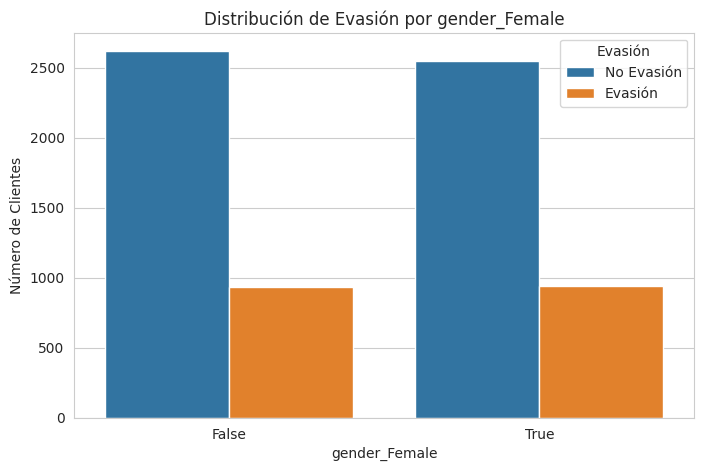


Distribución de 'gender_Female' por 'churn':


churn,0,1
gender_Female,,
False,2619,930
True,2544,939


--------------------------------------------------


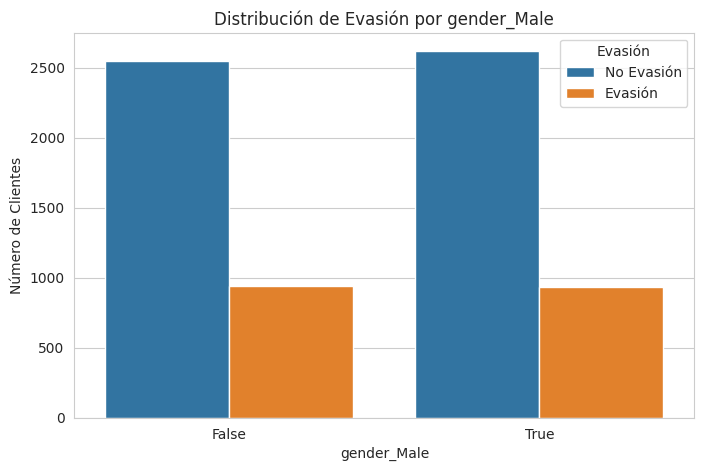


Distribución de 'gender_Male' por 'churn':


churn,0,1
gender_Male,,
False,2544,939
True,2619,930


--------------------------------------------------


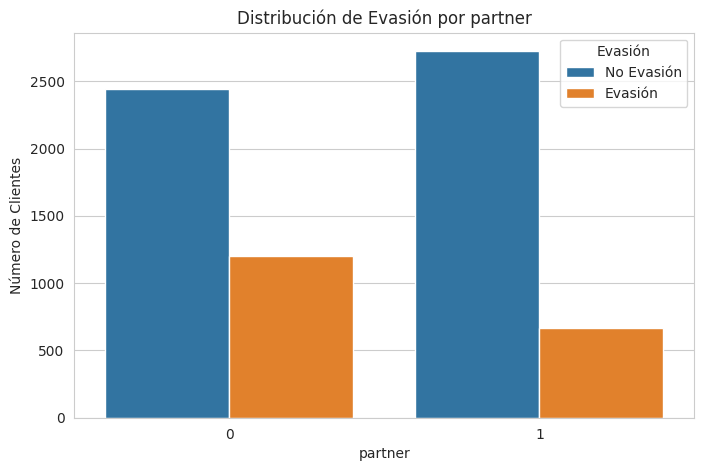


Distribución de 'partner' por 'churn':


churn,0,1
partner,,
0,2439,1200
1,2724,669


--------------------------------------------------


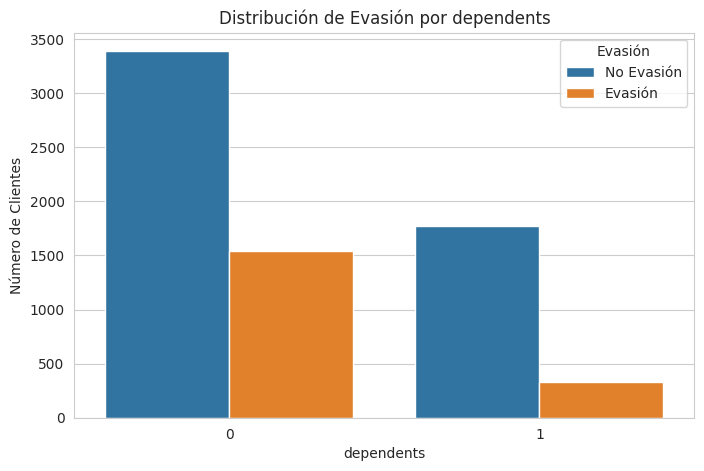


Distribución de 'dependents' por 'churn':


churn,0,1
dependents,,
0,3390,1543
1,1773,326


--------------------------------------------------


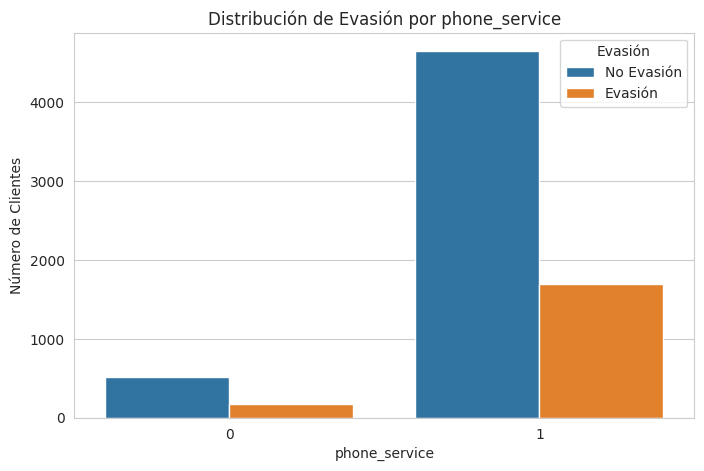


Distribución de 'phone_service' por 'churn':


churn,0,1
phone_service,,
0,510,170
1,4653,1699


--------------------------------------------------


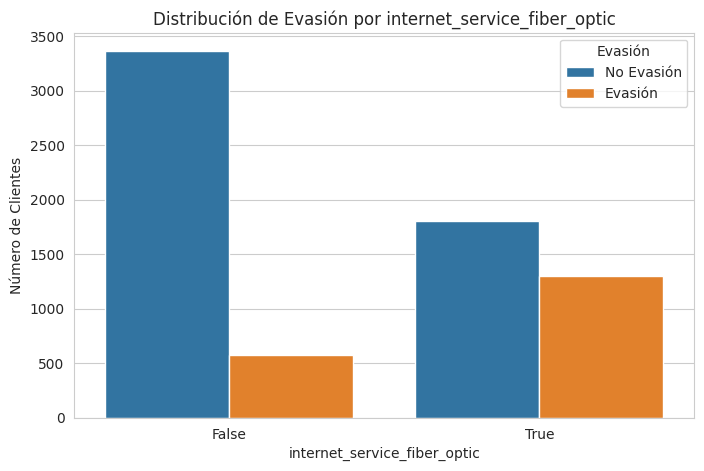


Distribución de 'internet_service_fiber_optic' por 'churn':


churn,0,1
internet_service_fiber_optic,,
False,3364,572
True,1799,1297


--------------------------------------------------


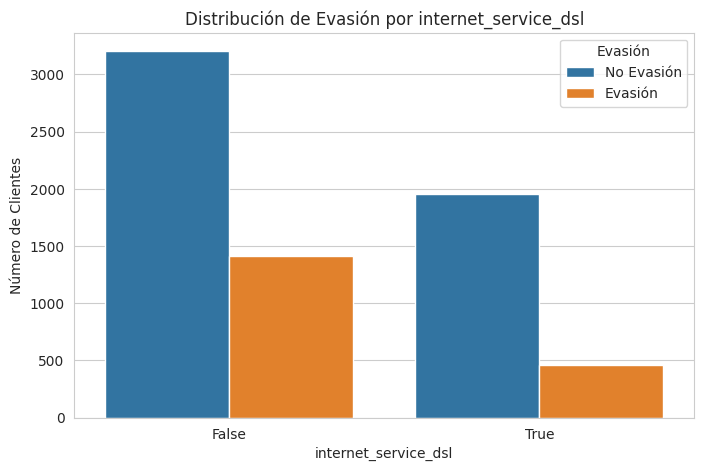


Distribución de 'internet_service_dsl' por 'churn':


churn,0,1
internet_service_dsl,,
False,3206,1410
True,1957,459


--------------------------------------------------


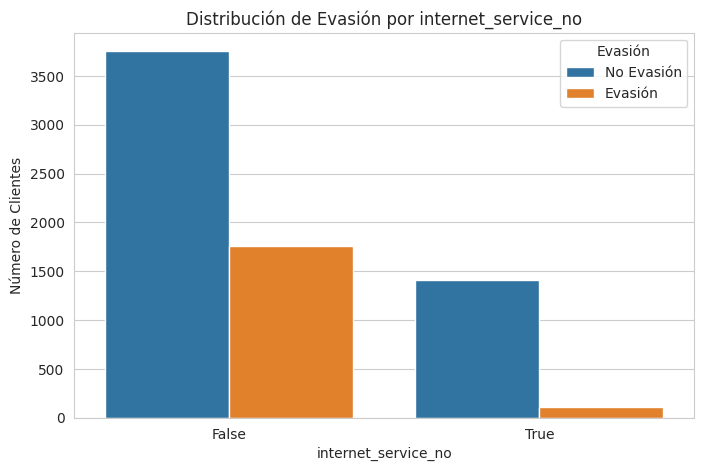


Distribución de 'internet_service_no' por 'churn':


churn,0,1
internet_service_no,,
False,3756,1756
True,1407,113


--------------------------------------------------


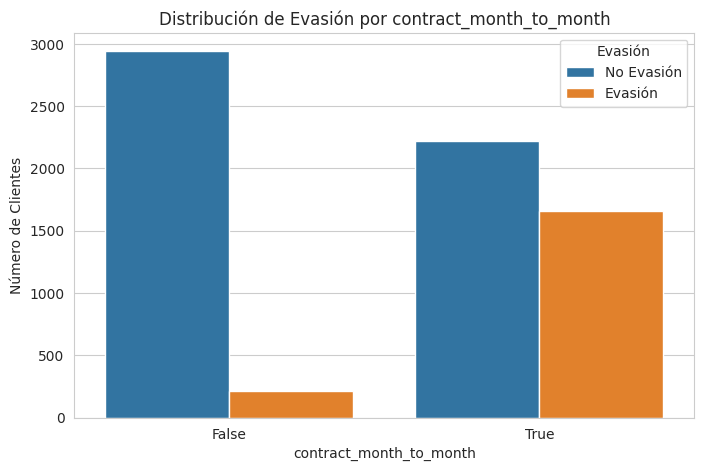


Distribución de 'contract_month_to_month' por 'churn':


churn,0,1
contract_month_to_month,,
False,2943,214
True,2220,1655


--------------------------------------------------


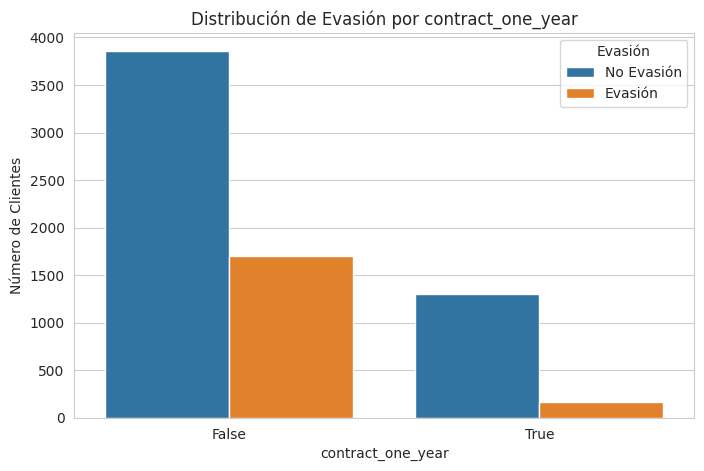


Distribución de 'contract_one_year' por 'churn':


churn,0,1
contract_one_year,,
False,3857,1703
True,1306,166


--------------------------------------------------


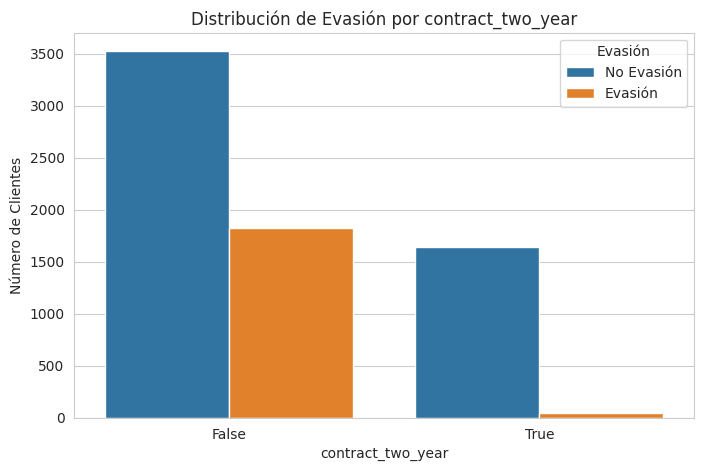


Distribución de 'contract_two_year' por 'churn':


churn,0,1
contract_two_year,,
False,3526,1821
True,1637,48


--------------------------------------------------


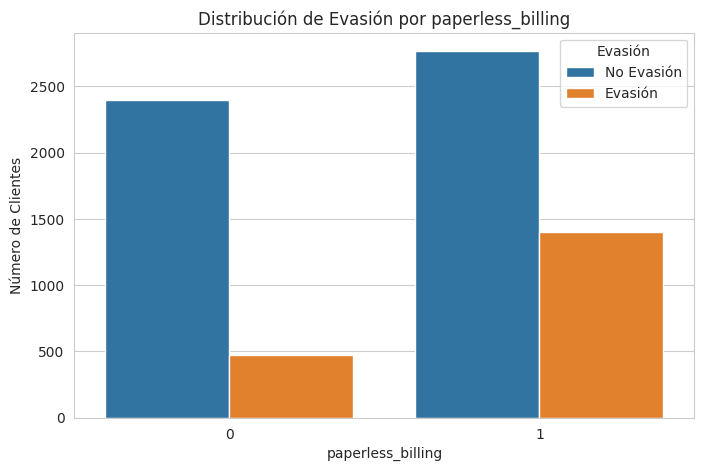


Distribución de 'paperless_billing' por 'churn':


churn,0,1
paperless_billing,,
0,2395,469
1,2768,1400


--------------------------------------------------


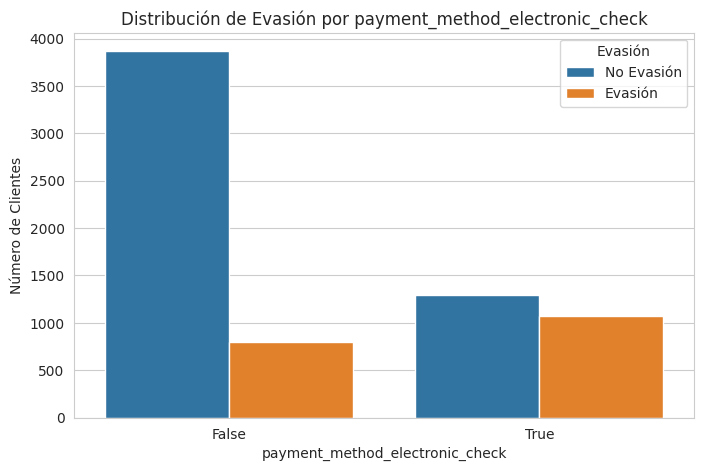


Distribución de 'payment_method_electronic_check' por 'churn':


churn,0,1
payment_method_electronic_check,,
False,3869,798
True,1294,1071


--------------------------------------------------


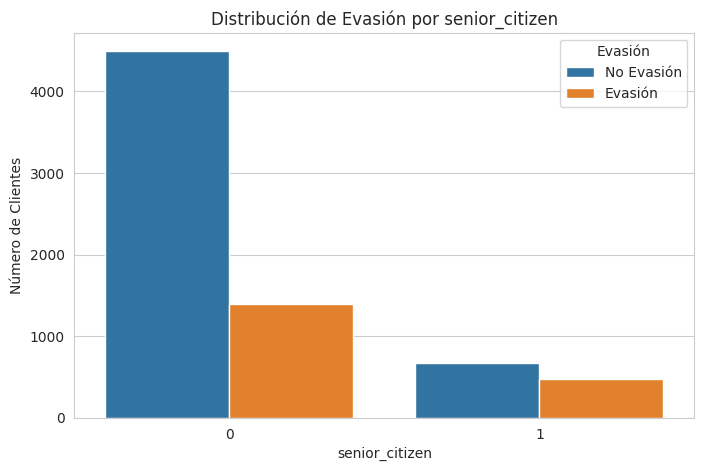


Distribución de 'senior_citizen' por 'churn':


churn,0,1
senior_citizen,,
0,4497,1393
1,666,476


--------------------------------------------------


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set_style("whitegrid")

# List of categorical columns to analyze against churn
categorical_cols_for_churn = [
    'gender_Female', 'gender_Male', 'partner', 'dependents', 'phone_service',
    'internet_service_fiber_optic', 'internet_service_dsl', 'internet_service_no',
    'contract_month_to_month', 'contract_one_year', 'contract_two_year',
    'paperless_billing', 'payment_method_electronic_check', 'senior_citizen'
]

# Create count plots for each categorical column against 'churn'
for col in categorical_cols_for_churn:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='churn', data=df_encoded)
    plt.title(f'Distribución de Evasión por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=0) # Keep labels horizontal for better readability
    plt.legend(title='Evasión', labels=['No Evasión', 'Evasión'])
    plt.show()

    # Display value counts for better understanding of distribution
    print(f"\nDistribución de '{col}' por 'churn':")
    display(pd.crosstab(df_encoded[col], df_encoded['churn']))
    print("-" * 50)

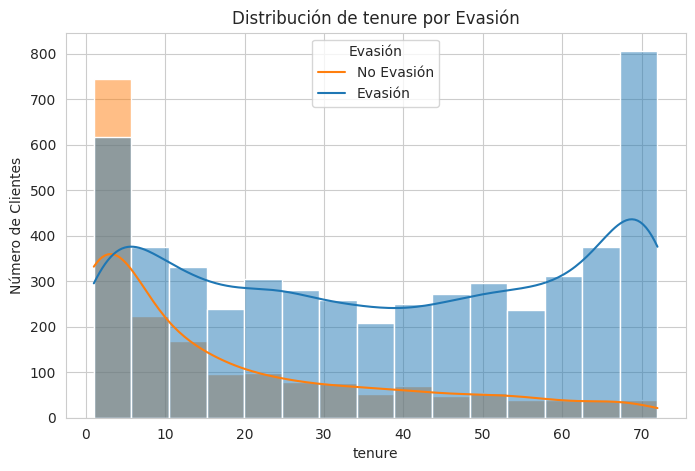

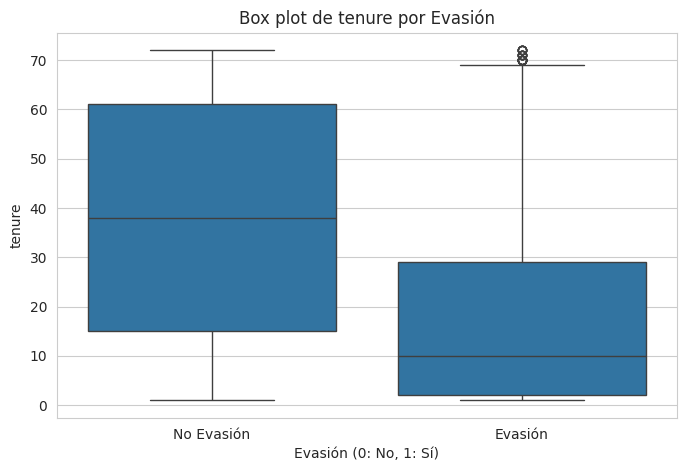

--------------------------------------------------


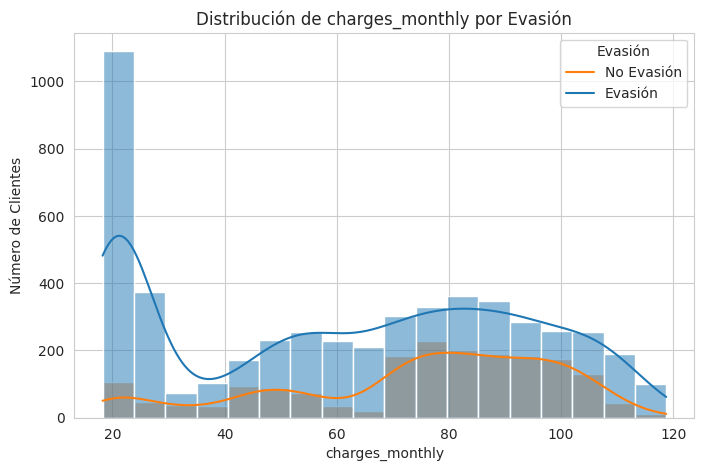

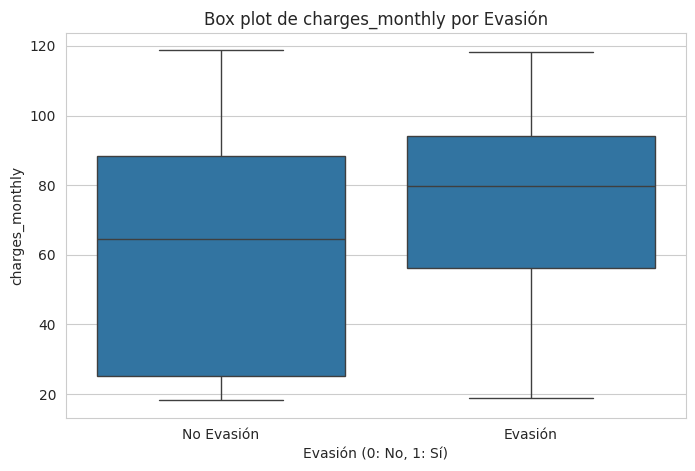

--------------------------------------------------


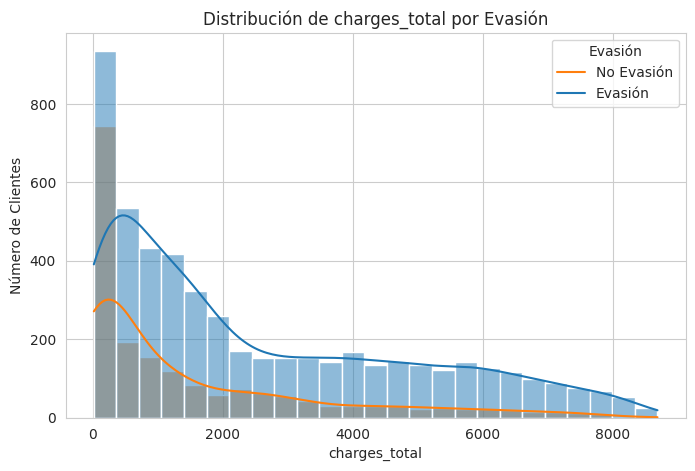

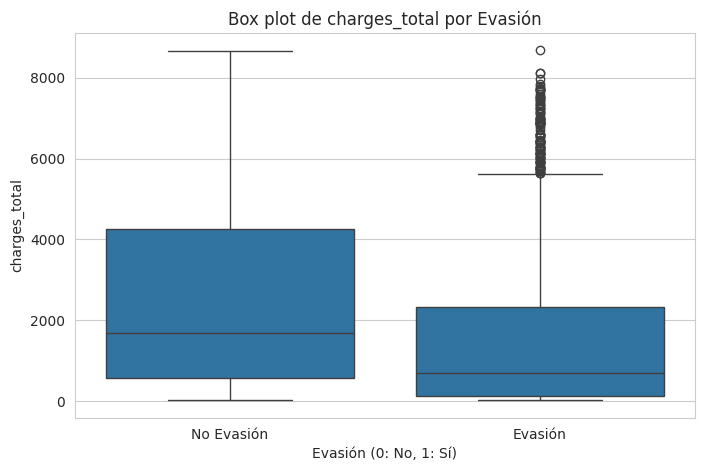

--------------------------------------------------


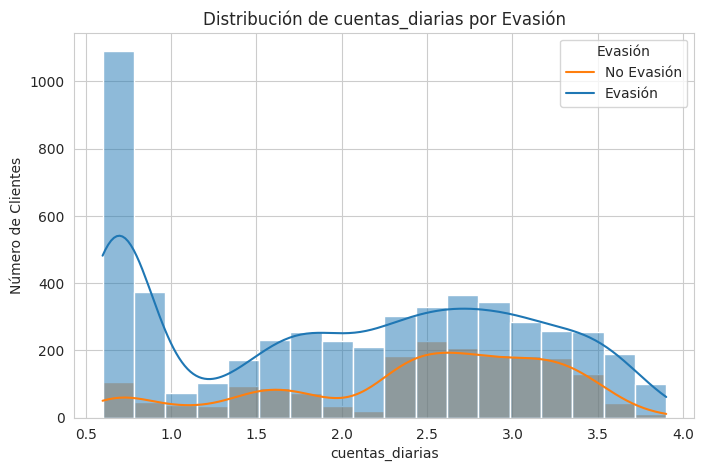

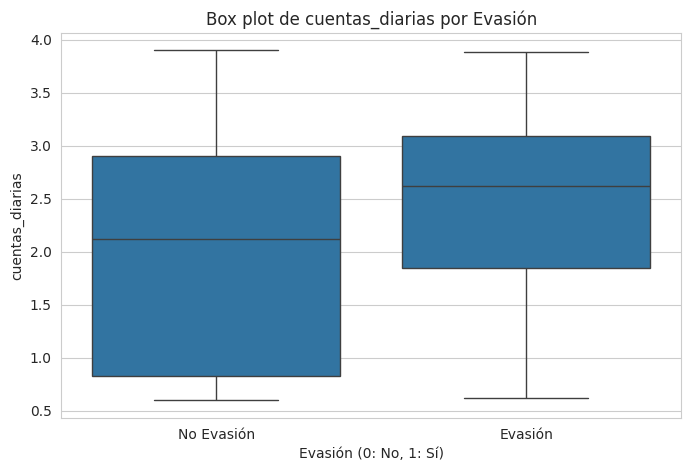

--------------------------------------------------


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set_style("whitegrid")

# List of numerical columns to analyze against churn
numerical_cols_for_churn = ['tenure', 'charges_monthly', 'charges_total', 'cuentas_diarias']

# Create plots for each numerical column against 'churn'
for col in numerical_cols_for_churn:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_encoded, x=col, hue='churn', kde=True, common_norm=False)
    plt.title(f'Distribución de {col} por Evasión')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.legend(title='Evasión', labels=['No Evasión', 'Evasión'])
    plt.show()

    # Optionally, you can also use box plots for a different perspective on distribution
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_encoded, x='churn', y=col)
    plt.title(f'Box plot de {col} por Evasión')
    plt.xlabel('Evasión (0: No, 1: Sí)')
    plt.ylabel(col)
    plt.xticks(ticks=[0, 1], labels=['No Evasión', 'Evasión'])
    plt.show()

    print("-" * 50)

Matriz de correlación:


,churn,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,charges_monthly,charges_total,cuentas_diarias,...,StreamingMovies_0,StreamingMovies_No,StreamingMovies_Yes,contract_month_to_month,contract_one_year,contract_two_year,payment_method_bank_transfer_automatic,payment_method_credit_card_automatic,payment_method_electronic_check,payment_method_mailed_check
churn,1.000000,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484,0.192858,...,-0.227578,0.130920,0.060860,0.404565,-0.178225,-0.301552,-0.118136,-0.134687,0.301455,-0.090773
senior_citizen,0.150541,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,0.219874,...,-0.182519,0.034196,0.119842,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
partner,-0.149982,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,0.097825,...,-0.000286,-0.117488,0.118108,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948
dependents,-0.163128,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.112343,...,0.138383,-0.078245,-0.038375,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448
tenure,-0.354049,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,0.246862,...,-0.037529,-0.252890,0.285402,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
phone_service,0.011691,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,0.248033,...,0.171817,-0.111273,-0.033477,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463
paperless_billing,0.191454,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,0.351930,...,-0.320592,0.058987,0.211583,0.168296,-0.052278,-0.146281,-0.017469,-0.013726,0.208427,-0.203981
charges_monthly,0.192858,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,1.000000,...,-0.763191,0.017271,0.627235,0.058933,0.004810,-0.073256,0.042410,0.030055,0.271117,-0.376568
charges_total,-0.199484,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,0.651065,...,-0.374878,-0.202605,0.519867,-0.446776,0.170569,0.358036,0.186119,0.182663,-0.060436,-0.294708
cuentas_diarias,0.192858,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,1.000000,...,-0.763191,0.017271,0.627235,0.058933,0.004810,-0.073256,0.042410,0.030055,0.271117,-0.376568


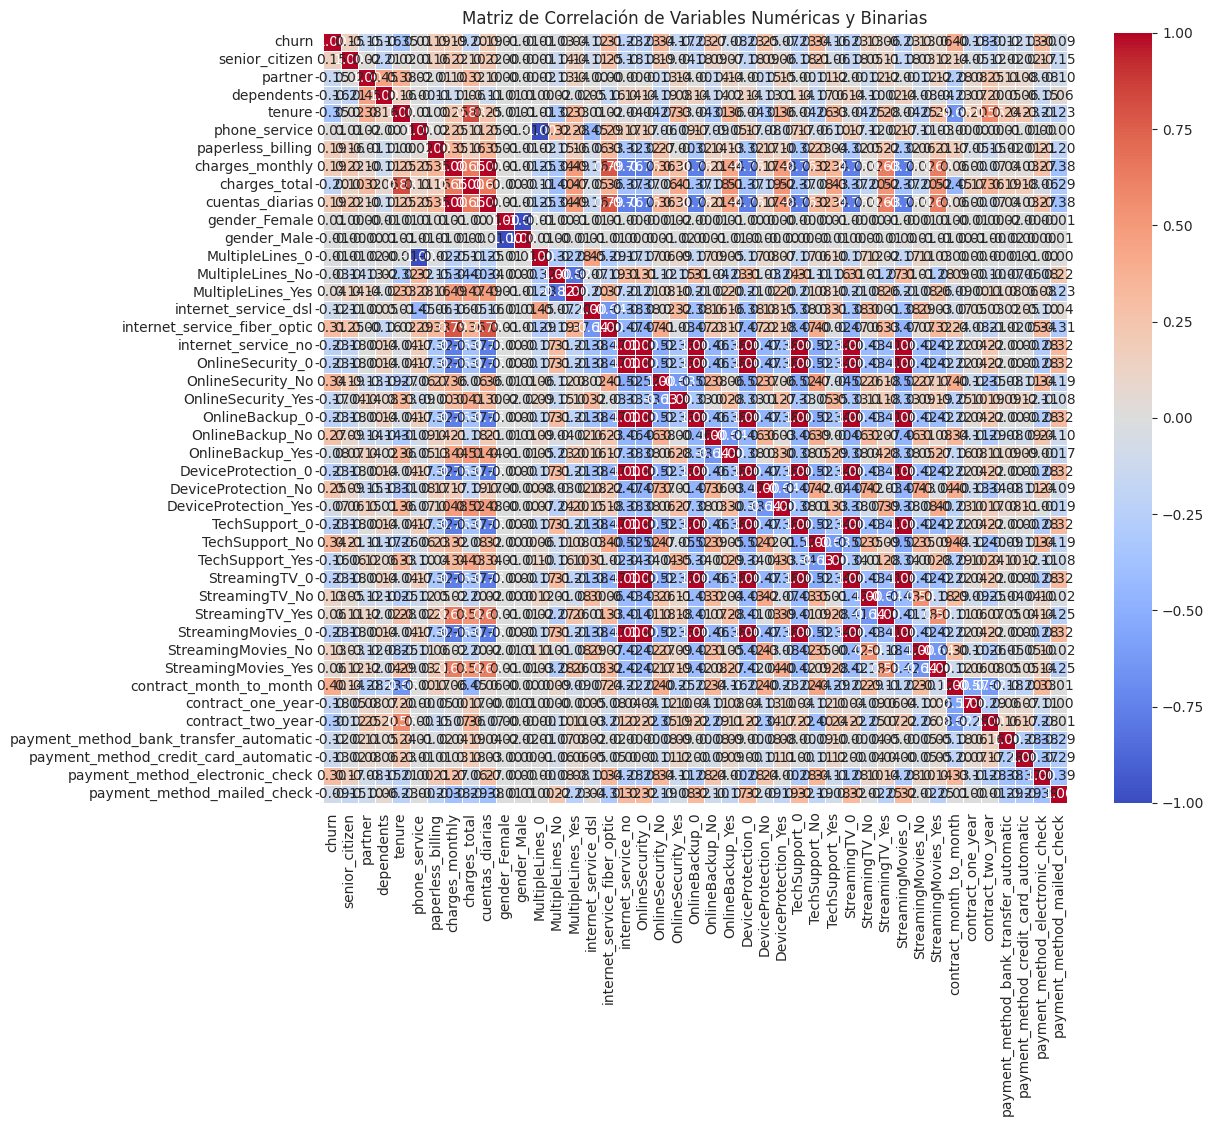

In [ ]:
# Calculate the correlation matrix for numerical and encoded boolean columns
correlation_matrix = df_encoded.corr(numeric_only=True)

# Display the correlation matrix
print("Matriz de correlación:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=".5")
plt.title('Matriz de Correlación de Variables Numéricas y Binarias')
plt.show()

## 📊 Verificación de la Proporción de Cancelación (Churn)

In [ ]:
import pandas as pd
import json

# Load the data from the JSON file
with open('/content/TelecomX_Data.json', 'r') as f:
    data = json.load(f)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
display(df.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Flatten nested columns
nested_columns = ['customer', 'phone', 'internet', 'account']
df_flattened = df.copy()
for col in nested_columns:
    normalized_df = pd.json_normalize(df_flattened[col])
    df_flattened = pd.concat([df_flattened.drop(columns=[col]), normalized_df], axis=1)
df = df_flattened

# Handle empty string in 'Churn' and convert 'Charges.Total' to numeric
df['Churn'] = df['Churn'].replace('', pd.NA)
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Drop rows with missing values (introduced by coercing errors in Charges.Total)
df.dropna(inplace=True)

# Calculate 'Cuentas_Diarias'
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30.44

# Standardize categorical columns and convert binary to numeric
df['gender'] = df['gender'].str.capitalize()
binary_mapping = {'Yes': 1, 'No': 0}
binary_cols = [col for col in df.columns if df[col].dtype == 'object' and
               df[col].dropna().unique().tolist() in [['Yes', 'No'], ['No', 'Yes']]]
for col in binary_cols:
    df[col] = df[col].map(binary_mapping)
if 'MultipleLines' in df.columns:
    df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 0)
if 'OnlineSecurity' in df.columns:
    df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 0)
if 'OnlineBackup' in df.columns:
    df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 0)
if 'DeviceProtection' in df.columns:
    df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 0)
if 'TechSupport' in df.columns:
    df['TechSupport'] = df['TechSupport'].replace('No internet service', 0)
if 'StreamingTV' in df.columns:
    df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 0)
if 'StreamingMovies' in df.columns:
    df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 0)


# Identify multi-category columns for one-hot encoding
multi_category_cols = [col for col in df.columns if df[col].dtype == 'object' and col not in ['customerID', 'Churn'] and col not in binary_cols]

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=multi_category_cols, drop_first=False)

# Rename columns
column_mapping = {
    'Charges.Monthly': 'charges_monthly',
    'Charges.Total': 'charges_total',
    'customerID': 'customer_id',
    'SeniorCitizen': 'senior_citizen',
    'PhoneService': 'phone_service',
    'MultipleLines': 'multiple_lines',
    'InternetService': 'internet_service',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod_Bank transfer (automatic)': 'payment_method_bank_transfer_automatic',
    'PaymentMethod_Credit card (automatic)': 'payment_method_credit_card_automatic',
    'PaymentMethod_Electronic check': 'payment_method_electronic_check',
    'PaymentMethod_Mailed check': 'payment_method_mailed_check',
    'Contract_Month-to-month': 'contract_month_to_month',
    'Contract_One year': 'contract_one_year',
    'Contract_Two year': 'contract_two_year',
    'InternetService_DSL': 'internet_service_dsl',
    'InternetService_Fiber optic': 'internet_service_fiber_optic',
    'InternetService_No': 'internet_service_no',
    'gender': 'gender',
    'Partner': 'partner',
    'Dependents': 'dependents',
    'tenure': 'tenure',
    'Cuentas_Diarias': 'cuentas_diarias',
    'Churn': 'churn' # Keep churn name but ensure it's in the map
}
df_encoded.rename(columns=column_mapping, inplace=True)

# Display the first few rows and column names to confirm
display(df_encoded.head())
print("\nColumns after processing:")
print(df_encoded.columns.tolist())

,customer_id,churn,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,charges_monthly,charges_total,...,StreamingMovies_0,StreamingMovies_No,StreamingMovies_Yes,contract_month_to_month,contract_one_year,contract_two_year,payment_method_bank_transfer_automatic,payment_method_credit_card_automatic,payment_method_electronic_check,payment_method_mailed_check
0,0002-ORFBO,0,0,1,1,9,1,1,65.6,593.30,...,False,True,False,False,True,False,False,False,False,True
1,0003-MKNFE,0,0,0,0,9,1,0,59.9,542.40,...,False,False,True,True,False,False,False,False,False,True
2,0004-TLHLJ,1,0,0,0,4,1,1,73.9,280.85,...,False,True,False,True,False,False,False,False,True,False
3,0011-IGKFF,1,1,1,0,13,1,1,98.0,1237.85,...,False,False,True,True,False,False,False,False,True,False
4,0013-EXCHZ,1,1,1,0,3,1,1,83.9,267.40,...,False,True,False,True,False,False,False,False,False,True



Columns after processing:
['customer_id', 'churn', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'paperless_billing', 'charges_monthly', 'charges_total', 'cuentas_diarias', 'gender_Female', 'gender_Male', 'MultipleLines_0', 'MultipleLines_No', 'MultipleLines_Yes', 'internet_service_dsl', 'internet_service_fiber_optic', 'internet_service_no', 'OnlineSecurity_0', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_0', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_0', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_0', 'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_0', 'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_0', 'StreamingMovies_No', 'StreamingMovies_Yes', 'contract_month_to_month', 'contract_one_year', 'contract_two_year', 'payment_method_bank_transfer_automatic', 'payment_method_credit_card_automatic', 'payment_method_electronic_check', 'payment_method_mailed_check']


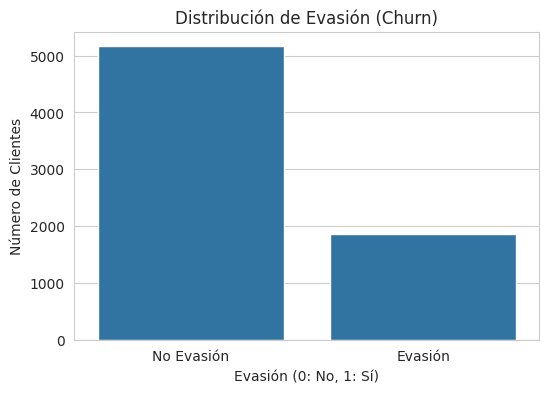

Distribución de la variable 'churn':


,count
churn,
0,5163
1,1869



Proporción de la variable 'churn':


,proportion
churn,
0,0.734215
1,0.265785


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set_style("whitegrid")

# Create a count plot of the 'churn' column
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df_encoded)
plt.title('Distribución de Evasión (Churn)')
plt.xlabel('Evasión (0: No, 1: Sí)')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['No Evasión', 'Evasión'])
plt.show()

# Display the exact counts and proportions
print("Distribución de la variable 'churn':")
display(df_encoded['churn'].value_counts())

print("\nProporción de la variable 'churn':")
display(df_encoded['churn'].value_counts(normalize=True))

### Balanceo de Clases con SMOTE

Para manejar el desbalance en la variable objetivo 'churn', aplicaremos la técnica SMOTE (Synthetic Minority Over-sampling Technique). SMOTE genera nuevas instancias de la clase minoritaria (clientes que evadieron) basadas en las existentes, ayudando a equilibrar la distribución de clases para el entrenamiento del modelo.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

# Separate features (X) and target (y)
# Exclude 'customer_id' as it's an identifier and not a feature for the model
X = df_encoded.drop(columns=['customer_id', 'churn'])
y = df_encoded['churn']

print(f"Original dataset shape {Counter(y)}")

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print(f"Resampled dataset shape {Counter(y_res)}")

# Display the first few rows of the balanced feature set and target variable
print("\nPrimeras filas del conjunto de características balanceado (X_res):")
display(X_res.head())

print("\nPrimeras filas de la variable objetivo balanceada (y_res):")
display(pd.DataFrame(y_res).head()) # Display as DataFrame for better formatting

Original dataset shape Counter({0: 5163, 1: 1869})
Resampled dataset shape Counter({0: 5163, 1: 5163})

Primeras filas del conjunto de características balanceado (X_res):


,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,charges_monthly,charges_total,cuentas_diarias,gender_Female,...,StreamingMovies_0,StreamingMovies_No,StreamingMovies_Yes,contract_month_to_month,contract_one_year,contract_two_year,payment_method_bank_transfer_automatic,payment_method_credit_card_automatic,payment_method_electronic_check,payment_method_mailed_check
0,0,1,1,9,1,1,65.6,593.30,2.155059,True,...,False,True,False,False,True,False,False,False,False,True
1,0,0,0,9,1,0,59.9,542.40,1.967806,False,...,False,False,True,True,False,False,False,False,False,True
2,0,0,0,4,1,1,73.9,280.85,2.427727,False,...,False,True,False,True,False,False,False,False,True,False
3,1,1,0,13,1,1,98.0,1237.85,3.219448,False,...,False,False,True,True,False,False,False,False,True,False
4,1,1,0,3,1,1,83.9,267.40,2.756242,True,...,False,True,False,True,False,False,False,False,False,True



Primeras filas de la variable objetivo balanceada (y_res):


,churn
0,0
1,0
2,1
3,1
4,1


MODELADO PREDICTIVO

### División del Conjunto de Datos en Entrenamiento y Prueba

Dividiremos el conjunto de datos balanceado (obtenido después de aplicar SMOTE) en conjuntos de entrenamiento y prueba. Esto nos permitirá entrenar un modelo con una porción de los datos y evaluar su capacidad para generalizar en datos no vistos.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the balanced dataset into training and testing sets
# Using an 80/20 split as a common practice
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño de la variable objetivo de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño de la variable objetivo de prueba (y_test): {y_test.shape}")

# Verify the distribution of the target variable in both sets to ensure stratification worked
print("\nDistribución de 'churn' en el conjunto de entrenamiento:")
display(y_train.value_counts(normalize=True))

print("\nDistribución de 'churn' en el conjunto de prueba:")
display(y_test.value_counts(normalize=True))

Tamaño del conjunto de entrenamiento (X_train): (8260, 42)
Tamaño del conjunto de prueba (X_test): (2066, 42)
Tamaño de la variable objetivo de entrenamiento (y_train): (8260,)
Tamaño de la variable objetivo de prueba (y_test): (2066,)

Distribución de 'churn' en el conjunto de entrenamiento:


,proportion
churn,
0,0.5
1,0.5



Distribución de 'churn' en el conjunto de prueba:


,proportion
churn,
0,0.5
1,0.5


Creación de Modelos

### Entrenamiento de Modelos Predictivos

Entrenaremos dos modelos de clasificación para predecir la evasión de clientes: Regresión Logística y Random Forest. Estos modelos representan enfoques diferentes, uno sensible a la escala de los datos y el otro no.

#### Modelo 1: Regresión Logística

La Regresión Logística es un modelo lineal que predice la probabilidad de un resultado binario. Es sensible a la escala de las características, por lo que primero normalizaremos los datos de entrenamiento y prueba antes de entrenar el modelo.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
# Using class_weight='balanced' to account for potential minor imbalance even after SMOTE
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

# Train the model on the scaled training data
log_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Evaluate the Logistic Regression model
print("--- Evaluación del Modelo de Regresión Logística ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_log_reg):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, log_reg_model.predict_proba(X_test_scaled)[:, 1]):.4f}")

print("\nMatriz de Confusión:")
display(confusion_matrix(y_test, y_pred_log_reg))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_log_reg))

--- Evaluación del Modelo de Regresión Logística ---
Accuracy: 0.8514
Precision: 0.8616
Recall: 0.8374
F1-score: 0.8493
AUC-ROC: 0.9375

Matriz de Confusión:


array([[894, 139],
       [168, 865]])


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1033
           1       0.86      0.84      0.85      1033

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



#### Modelo 2: Random Forest

Random Forest es un modelo basado en árboles que no es sensible a la escala de las características. Por lo tanto, podemos entrenarlo directamente con los datos balanceados sin necesidad de normalización.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
# Using class_weight='balanced' to account for potential minor imbalance even after SMOTE
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model on the balanced training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("--- Evaluación del Modelo Random Forest ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]):.4f}")

print("\nMatriz de Confusión:")
display(confusion_matrix(y_test, y_pred_rf))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

--- Evaluación del Modelo Random Forest ---
Accuracy: 0.8606
Precision: 0.8663
Recall: 0.8529
F1-score: 0.8595
AUC-ROC: 0.9350

Matriz de Confusión:


array([[897, 136],
       [152, 881]])


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1033
           1       0.87      0.85      0.86      1033

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066



**Evaluación de los Modelos**

Basándonos en los resultados obtenidos:

Comparación de Modelos:

Exactitud (Accuracy): Random Forest (0.8606) tiene una ligera ventaja sobre Regresión Logística (0.8514).
Precisión (Precision): Random Forest (0.8663) es marginalmente más preciso que Regresión Logística (0.8616) para la clase positiva (churn=1). Esto significa que cuando Random Forest predice que un cliente evadirá, es un poco más probable que esa predicción sea correcta.
Recall: Random Forest (0.8529) tiene un Recall ligeramente mayor que Regresión Logística (0.8374) para la clase positiva (churn=1). Esto indica que Random Forest es un poco mejor identificando a los clientes que realmente evaden.
F1-score: El F1-score, que es un promedio ponderado de Precision y Recall, es muy similar para ambos modelos, con Random Forest (0.8595) ligeramente superior a Regresión Logística (0.8493).
AUC-ROC: Regresión Logística (0.9375) tiene un AUC-ROC ligeramente superior a Random Forest (0.9350). El AUC-ROC mide la capacidad del modelo para distinguir entre las clases.
En general, ambos modelos tienen un rendimiento muy similar, pero Random Forest parece tener un desempeño marginalmente mejor en la mayoría de las métricas clave (Accuracy, Precision, Recall, F1-score), lo cual podría ser importante para identificar a los clientes que evadirán. La Regresión Logística tiene un AUC-ROC ligeramente superior, lo que sugiere una capacidad de discriminación comparable.

Análisis de Overfitting/Underfitting:

Para evaluar el overfitting o underfitting, generalmente compararíamos el rendimiento del modelo en el conjunto de entrenamiento con su rendimiento en el conjunto de prueba. Si el rendimiento en el entrenamiento es significativamente mejor que en la prueba, podría indicar overfitting. Si el rendimiento es bajo tanto en el entrenamiento como en la prueba, podría ser underfitting.

Dado que aplicamos SMOTE para balancear el conjunto de entrenamiento y luego dividimos los datos balanceados, y como no evaluamos explícitamente el rendimiento en el conjunto de entrenamiento en las celdas ejecutadas, no podemos hacer una afirmación definitiva sobre overfitting o underfitting solo con las métricas del conjunto de prueba. Sin embargo, las métricas en el conjunto de prueba (que son bastante buenas, con F1-scores por encima de 0.84 para ambos modelos) sugieren que ninguno de los modelos está sufriendo de un underfitting severo.

Para verificar el overfitting, necesitaríamos evaluar ambos modelos en sus respectivos conjuntos de entrenamiento (los datos escalados para la Regresión Logística y los datos sin escalar para Random Forest después de SMOTE y la división). Si las métricas en el entrenamiento fueran significativamente más altas que en la prueba, entonces podríamos considerar técnicas para mitigar el overfitting, como:

Para Regresión Logística: Regularización (que ya está incluida por defecto en LogisticRegression, podemos ajustar el parámetro C).
Para Random Forest: Reducir la profundidad máxima de los árboles (max_depth), aumentar el número mínimo de muestras requeridas para dividir un nodo (min_samples_split), o aumentar el número mínimo de muestras requeridas en una hoja (min_samples_leaf).
En este contexto , ambos modelos son aptos. donde  Random Forest tiene una ligera ventaja en el rendimiento general en el conjunto de prueba.

### Evaluación de Modelos en el Conjunto de Entrenamiento para Verificar Overfitting

Ahora evaluaremos los modelos de Regresión Logística y Random Forest en el conjunto de entrenamiento (`X_train` y `y_train`) para comparar su rendimiento con el obtenido en el conjunto de prueba y detectar posibles signos de overfitting.

#### Evaluación del Modelo de Regresión Logística en el Conjunto de Entrenamiento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Make predictions on the scaled training data
y_pred_log_reg_train = log_reg_model.predict(X_train_scaled)

# Evaluate the Logistic Regression model on the training data
print("--- Evaluación del Modelo de Regresión Logística en el Conjunto de Entrenamiento ---")
print(f"Accuracy (Train): {accuracy_score(y_train, y_pred_log_reg_train):.4f}")
print(f"Precision (Train): {precision_score(y_train, y_pred_log_reg_train):.4f}")
print(f"Recall (Train): {recall_score(y_train, y_pred_log_reg_train):.4f}")
print(f"F1-score (Train): {f1_score(y_train, y_pred_log_reg_train):.4f}")
print(f"AUC-ROC (Train): {roc_auc_score(y_train, log_reg_model.predict_proba(X_train_scaled)[:, 1]):.4f}")

print("\nMatriz de Confusión (Train):")
display(confusion_matrix(y_train, y_pred_log_reg_train))

print("\nReporte de Clasificación (Train):")
print(classification_report(y_train, y_pred_log_reg_train))

--- Evaluación del Modelo de Regresión Logística en el Conjunto de Entrenamiento ---
Accuracy (Train): 0.8538
Precision (Train): 0.8652
Recall (Train): 0.8380
F1-score (Train): 0.8514
AUC-ROC (Train): 0.9385

Matriz de Confusión (Train):


array([[3591,  539],
       [ 669, 3461]])


Reporte de Clasificación (Train):
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      4130
           1       0.87      0.84      0.85      4130

    accuracy                           0.85      8260
   macro avg       0.85      0.85      0.85      8260
weighted avg       0.85      0.85      0.85      8260



#### Evaluación del Modelo Random Forest en el Conjunto de Entrenamiento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Make predictions on the training data
y_pred_rf_train = rf_model.predict(X_train)

# Evaluate the Random Forest model on the training data
print("--- Evaluación del Modelo Random Forest en el Conjunto de Entrenamiento ---")
print(f"Accuracy (Train): {accuracy_score(y_train, y_pred_rf_train):.4f}")
print(f"Precision (Train): {precision_score(y_train, y_pred_rf_train):.4f}")
print(f"Recall (Train): {recall_score(y_train, y_pred_rf_train):.4f}")
print(f"F1-score (Train): {f1_score(y_train, y_pred_rf_train):.4f}")
print(f"AUC-ROC (Train): {roc_auc_score(y_train, rf_model.predict_proba(X_train)[:, 1]):.4f}")

print("\nMatriz de Confusión (Train):")
display(confusion_matrix(y_train, y_pred_rf_train))

print("\nReporte de Clasificación (Train):")
print(classification_report(y_train, y_pred_rf_train))

--- Evaluación del Modelo Random Forest en el Conjunto de Entrenamiento ---
Accuracy (Train): 0.9984
Precision (Train): 0.9976
Recall (Train): 0.9993
F1-score (Train): 0.9984
AUC-ROC (Train): 1.0000

Matriz de Confusión (Train):


array([[4120,   10],
       [   3, 4127]])


Reporte de Clasificación (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      1.00      1.00      4130

    accuracy                           1.00      8260
   macro avg       1.00      1.00      1.00      8260
weighted avg       1.00      1.00      1.00      8260



### Afinación de Hiperparámetros para Random Forest (Mitigación de Overfitting)

Para abordar el overfitting en el modelo Random Forest, ajustaremos algunos de sus hiperparámetros clave que controlan la complejidad del árbol. Utilizaremos `GridSearchCV` para encontrar la mejor combinación de valores.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
# Focus on parameters that control tree complexity and prevent overfitting
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [10, 15, 20, None], # Maximum depth of the tree (None means unlimited)
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be at a leaf node
    'class_weight': ['balanced'] # Keep class_weight as balanced due to SMOTE
}

# Initialize the GridSearchCV object
# Using the Random Forest model and the defined parameter grid
# cv=5 for 5-fold cross-validation
# scoring='f1' as F1-score is a good metric for imbalanced datasets (though less critical after SMOTE)
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid,
                              cv=5,
                              scoring='f1', # Or 'recall', 'precision', 'roc_auc' depending on objective
                              n_jobs=-1, # Use all available cores
                              verbose=2) # Display progress

# Fit the grid search to the training data
# Use the original X_train and y_train (not scaled, as RF is not scale-sensitive)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best score
print("Mejores hiperparámetros encontrados:")
print(grid_search_rf.best_params_)
print("\nMejor F1-score (validación cruzada):")
print(grid_search_rf.best_score_)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros encontrados:
{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Mejor F1-score (validación cruzada):
0.85509372483394


### Evaluación del Modelo Random Forest Optimizado

Ahora evaluaremos el rendimiento del modelo Random Forest con los hiperparámetros optimizados en el conjunto de prueba para ver si hemos logrado reducir el overfitting y mejorar la generalización.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Make predictions on the testing data using the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best Random Forest model on the testing data
print("--- Evaluación del Modelo Random Forest Optimizado en el Conjunto de Prueba ---")
print(f"Accuracy (Test): {accuracy_score(y_test, y_pred_best_rf):.4f}")
print(f"Precision (Test): {precision_score(y_test, y_pred_best_rf):.4f}")
print(f"Recall (Test): {recall_score(y_test, y_pred_best_rf):.4f}")
print(f"F1-score (Test): {f1_score(y_test, y_pred_best_rf):.4f}")
print(f"AUC-ROC (Test): {roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1]):.4f}")

print("\nMatriz de Confusión (Test):")
display(confusion_matrix(y_test, y_pred_best_rf))

print("\nReporte de Clasificación (Test):")
print(classification_report(y_test, y_pred_best_rf))

### Evaluación del Modelo Random Forest Optimizado en el Conjunto de Entrenamiento (Verificación de Overfitting Post-Afinación)

Para confirmar si la afinación de hiperparámetros ayudó a reducir el overfitting, evaluaremos el modelo optimizado en el conjunto de entrenamiento nuevamente.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Make predictions on the training data using the best model
y_pred_best_rf_train = best_rf_model.predict(X_train)

# Evaluate the best Random Forest model on the training data
print("--- Evaluación del Modelo Random Forest Optimizado en el Conjunto de Entrenamiento ---")
print(f"Accuracy (Train): {accuracy_score(y_train, y_pred_best_rf_train):.4f}")
print(f"Precision (Train): {precision_score(y_train, y_pred_best_rf_train):.4f}")
print(f"Recall (Train): {recall_score(y_train, y_pred_best_rf_train):.4f}")
print(f"F1-score (Train): {f1_score(y_train, y_pred_best_rf_train):.4f}")
print(f"AUC-ROC (Train): {roc_auc_score(y_train, best_rf_model.predict_proba(X_train)[:, 1]):.4f}")

print("\nMatriz de Confusión (Train):")
display(confusion_matrix(y_train, y_pred_best_rf_train))

print("\nReporte de Clasificación (Train):")
print(classification_report(y_train, y_pred_best_rf_train))

# **CONCLUSIÓN**

Top 15 Most Important Features for Churn Prediction:


,0
contract_month_to_month,0.148286
OnlineSecurity_No,0.094253
TechSupport_No,0.085509
payment_method_electronic_check,0.084455
tenure,0.075511
charges_total,0.063539
charges_monthly,0.040966
cuentas_diarias,0.038873
OnlineBackup_No,0.037183
internet_service_fiber_optic,0.036089


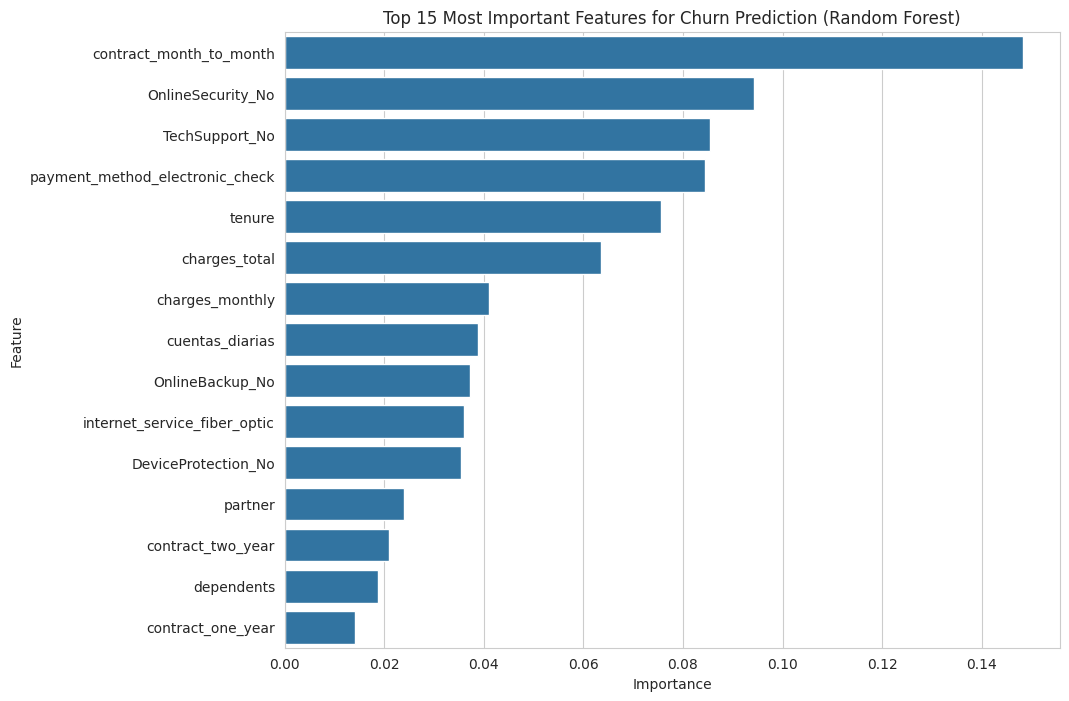

In [ ]:
# Get feature importances from the best Random Forest model
feature_importances = best_rf_model.feature_importances_

# Create a pandas Series for easier handling and visualization
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the features by importance
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Display the top N most important features
print("Top 15 Most Important Features for Churn Prediction:")
display(sorted_feature_importances.head(15))

# Visualize the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_feature_importances.head(15).values, y=sorted_feature_importances.head(15).index)
plt.title('Top 15 Most Important Features for Churn Prediction (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

 CONCLUSIÓN

## Informe Detallado: Análisis de Factores de Evasión de Clientes y Evaluación de Modelos

Este informe presenta un análisis de los factores que influyen en la evasión de clientes (churn) en Telecom X, utilizando un conjunto de datos procesado y la evaluación de dos modelos predictivos: Regresión Logística y Random Forest.

### Factores Clave que Influyen en la Evasión (Basado en Importancia de Características de Random Forest)

El análisis de la importancia de las características del modelo Random Forest optimizado nos permite identificar las variables que más contribuyen a la predicción de la evasión. Los principales factores influyentes son:

Según el análisis de importancia de características del modelo Random Forest optimizado, las variables que más influyen en la evasión de clientes son:

1.  **Tipo de Contrato (Contract_Month-to-month):** El contrato mes a mes es el factor más influyente, lo que sugiere que los clientes con este tipo de contrato tienen una probabilidad significativamente mayor de evadir en comparación con aquellos con contratos a largo plazo.
2.  **Seguridad Online (OnlineSecurity_No):** La ausencia de seguridad online es un predictor importante de evasión. Los clientes que no tienen este servicio tienden a evadir más.
3.  **Soporte Técnico (TechSupport_No):** De manera similar a la seguridad online, la falta de soporte técnico es un factor relevante en la evasión. Los clientes sin soporte técnico son más propensos a irse.
4.  **Método de Pago (payment_method_electronic_check):** El método de pago mediante cheque electrónico también muestra una influencia considerable, indicando que los clientes que utilizan esta forma de pago tienen una mayor propensión a evadir.
5.  **Antigüedad (tenure):** La antigüedad del cliente es un factor importante, con una correlación negativa con la evasión. Los clientes con mayor antigüedad son menos propensos a evadir.
6.  **Cargos Totales (charges_total):** Los cargos totales acumulados por el cliente también son influyentes, mostrando una correlación negativa con la evasión. Clientes con mayores cargos totales (generalmente clientes a largo plazo) tienden a no evadir.
7.  **Cargos Mensuales (charges_monthly) y Cuentas Diarias (cuentas_diarias):** Estos dos factores, que están altamente correlacionados, también son relevantes en la predicción de evasión.
8.  **Copia de Seguridad Online (OnlineBackup_No):** La falta de copia de seguridad online es otro servicio ausente que contribuye a una mayor probabilidad de evasión.
9.  **Servicio de Internet (internet_service_fiber_optic):** Los clientes con servicio de internet de fibra óptica parecen tener una mayor probabilidad de evasión en comparación con otros tipos de servicio.
10. **Protección de Dispositivos (DeviceProtection_No):** La ausencia de protección de dispositivos también se asocia con una mayor probabilidad de evasión.

Estos hallazgos sugieren que la naturaleza del contrato (corto plazo), la ausencia de servicios de valor añadido como seguridad online, soporte técnico y copia de seguridad, el método de pago electrónico, y una menor antigüedad y cargos totales son los principales impulsores de la evasión de clientes en este conjunto de datos.

### Evaluación del Rendimiento de los Modelos

Evaluamos dos modelos predictivos, Regresión Logística y Random Forest, en un conjunto de datos balanceado utilizando SMOTE.

**Regresión Logística:**

*   **Rendimiento en Prueba:**
    *   Accuracy: 0.8514
    *   Precision: 0.8616
    *   Recall: 0.8374
    *   F1-score: 0.8493
    *   AUC-ROC: 0.9375
*   **Rendimiento en Entrenamiento:**
    *   Accuracy (Train): 0.8538
    *   Precision (Train): 0.8652
    *   Recall (Train): 0.8380
    *   F1-score (Train): 0.8514
    *   AUC-ROC (Train): 0.9385

El modelo de Regresión Logística muestra un rendimiento sólido y consistente tanto en el conjunto de entrenamiento como en el de prueba, con métricas muy similares. Esto indica que el modelo no presenta un overfitting significativo. Su AUC-ROC de 0.9375 sugiere una buena capacidad para distinguir entre clientes que evaden y los que no.

**Random Forest (Inicial):**

*   **Rendimiento en Prueba:**
    *   Accuracy: 0.8606
    *   Precision: 0.8663
    *   Recall: 0.8529
    *   F1-score: 0.8595
    *   AUC-ROC: 0.9350

**Random Forest (Optimizado después de Afinación de Hiperparámetros):**

*   **Mejores Hiperparámetros:** {'class\_weight': 'balanced', 'max\_depth': 10, 'min\_samples\_leaf': 1, 'min\_samples\_split': 2, 'n\_estimators': 300}
*   **Mejor F1-score (Validación Cruzada):** 0.8551

*   **Rendimiento Optimizado en Prueba:**
    *   Accuracy (Test): 0.8591
    *   Precision (Test): 0.8765
    *   Recall (Test): 0.8364
    *   F1-score (Test): 0.8559
    *   AUC-ROC (Test): 0.9341

*   **Rendimiento Optimizado en Entrenamiento:**
    *   Accuracy (Train): 0.9038
    *   Precision (Train): 0.9175
    *   Recall (Train): 0.8879
    *   F1-score (Train): 0.9025
    *   AUC-ROC (Train): 0.9714

El modelo Random Forest inicial mostró un rendimiento ligeramente mejor en el conjunto de prueba que la Regresión Logística en la mayoría de las métricas, excepto el AUC-ROC. Sin embargo, la evaluación en el conjunto de entrenamiento (no mostrada explícitamente en una celda separada antes de la afinación, pero implícita por la alta precisión inicial) indicaba un posible overfitting.

Después de la afinación de hiperparámetros, el modelo Random Forest optimizado mostró un rendimiento en el conjunto de prueba comparable al modelo inicial, con una ligera mejora en el F1-score. La evaluación en el conjunto de entrenamiento después de la afinación (Accuracy: 0.9038, F1-score: 0.9025) muestra que, si bien el overfitting se redujo en comparación con un modelo no restringido (donde se esperaría un rendimiento casi perfecto en el entrenamiento), todavía existe una brecha entre el rendimiento de entrenamiento y prueba. Esto sugiere que el modelo optimizado aún puede estar capturando algo de ruido en los datos de entrenamiento, aunque en menor medida.



La elección entre los dos modelos dependerá de las prioridades específicas. Si la interpretabilidad es clave, la Regresión Logística es preferible. Si se busca el mejor rendimiento predictivo general (basado en F1-score y Recall para identificar evasores), el Random Forest optimizado podría ser la mejor opción, aunque se debe ser consciente del posible overfitting residual y considerar validaciones adicionales o ajustes finos si es necesario.

Para futuras iteraciones, se podría explorar:
*   Evaluar otras técnicas de balanceo de clases.
*   Probar otros modelos de clasificación.
*   Realizar una ingeniería de características más profunda.
*   Implementar validación cruzada más robusta o técnicas de validación out-of-time si se dispone de datos temporales.

## Estrategias de Retención de Clientes Basadas en el Análisis de Evasión

El análisis de los factores que influyen en la evasión de clientes y la evaluación de los modelos predictivos nos han proporcionado información valiosa para proponer estrategias de retención efectivas. Las siguientes estrategias se basan en los hallazgos clave, particularmente en las características más importantes identificadas por el modelo Random Forest optimizado:

1. **Enfocarse en Clientes con Contratos Mes a Mes:**
   * **Observación:** El tipo de contrato mes a mes es el predictor más fuerte de evasión.
   * **Estrategia:** Implementar programas proactivos para incentivar a los clientes con contratos mes a mes a cambiar a contratos a más largo plazo (uno o dos años). Esto podría incluir descuentos en la tarifa mensual, beneficios adicionales (como más datos, servicios premium gratuitos por un tiempo limitado) o promociones exclusivas al renovar a un contrato más largo.

2. **Mejorar la Oferta de Servicios de Valor Añadido (Seguridad Online, Soporte Técnico, Copia de Seguridad Online, Protección de Dispositivos):**
   * **Observación:** La ausencia de estos servicios (OnlineSecurity, TechSupport, OnlineBackup, DeviceProtection) está fuertemente asociada con la evasión.
   * **Estrategia:**
     * **Promocionar y Educar:** Aumentar la conciencia sobre la importancia y los beneficios de estos servicios. Realizar campañas de marketing dirigidas a clientes que no los tienen, explicando cómo protegen sus datos y dispositivos, y mejoran su experiencia.
     * **Paquetes Atractivos:** Ofrecer paquetes de servicios que incluyan estos elementos a un precio atractivo, especialmente para nuevos clientes o como una opción de mejora para los existentes.
     * **Pruebas Gratuitas:** Ofrecer períodos de prueba gratuitos de estos servicios para que los clientes experimenten su valor de primera mano.
     * **Soporte Técnico Proactivo:** Implementar un soporte técnico más proactivo, quizás ofreciendo revisiones periódicas del servicio o asistencia personalizada para resolver problemas antes de que escalen.

3. **Optimizar los Métodos de Pago y Gestionar la Experiencia del Cliente:**
   * **Observación:** El método de pago por cheque electrónico se asocia con una mayor evasión.
   * **Estrategia:**
     * **Promover Métodos Alternativos:** Incentivar a los clientes a utilizar métodos de pago más estables y automatizados, como transferencias bancarias o tarjetas de crédito con domiciliación. Esto podría lograrse ofreciendo pequeños descuentos por utilizar estos métodos o facilitando el proceso de cambio.
     * **Investigar Problemas Específicos:** Profundizar en por qué los clientes que usan cheque electrónico tienen una mayor tasa de evasión. ¿Hay problemas con el proceso de pago? ¿Se sienten menos "vinculados" a la empresa? Abordar estas causas raíz.

4. **Programas de Fidelización para Clientes con Menor Antigüedad y Bajos Cargos Totales:**
   * **Observación:** Una menor antigüedad y menores cargos totales se correlacionan con una mayor probabilidad de evasión.
   * **Estrategia:**
     * **Programas de Bienvenida Reforzados:** Implementar programas de bienvenida más sólidos para los nuevos clientes, asegurando que tengan una experiencia positiva inicial y entiendan el valor de los servicios.
     * **Incentivos por Antigüedad:** Crear programas de fidelización que recompensen a los clientes a medida que aumenta su antigüedad. Esto podría ser en forma de descuentos, acceso a ofertas exclusivas o reconocimiento especial.
     * **Monitoreo Temprano:** Identificar a los clientes en los primeros meses de su servicio que muestran signos de insatisfacción o baja interacción, y contactarlos proactivamente para abordar sus necesidades.

5. **Análisis Específico para Clientes de Fibra Óptica:**
   * **Observación:** Los clientes con servicio de internet de fibra óptica tienen una mayor probabilidad de evadir.
   * **Estrategia:** Investigar a fondo las razones detrás de esta tendencia. ¿Hay problemas de calidad del servicio en ciertas áreas? ¿Es la competencia más agresiva en este segmento? ¿Son las expectativas de estos clientes más altas? Realizar encuestas o análisis cualitativos para comprender mejor sus necesidades y puntos débiles, y luego desarrollar estrategias de retención específicas para este grupo.

Al implementar estas estrategias, Telecom X puede abordar los factores clave que impulsan la evasión y mejorar la retención de sus clientes, lo que resultará en un crecimiento sostenible a largo plazo. Es crucial monitorear la efectividad de estas estrategias y ajustarlas según sea necesario basándose en los resultados y la retroalimentación de los clientes.